## The Ancient Geocentric Model

Huntian model claims that stars are carved on a static geodesic dome rotating around the earth, which is the center of the know universe. However, the sun, moon, and planets are found not following the same track of stars and are claimed to rotate independently inside the dome. In other words, no specific models are given.

This chapter looks into the moving of the sun, moon, and planets using the ancient model and see how good they fit.

### Sun

In [1]:
import pandas as pd # data analysis
import numpy as np # sientific computing
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split

#### Trial

In [7]:
# import daily noon sun position of every 2 days, 118.1.1 to 128.1.1
df = pd.read_pickle("sun_48h_noon.df")
df = df.drop(0)

# remove night
# df=df.loc[df['Alt']>10]

Text(0.5, 1.0, 'Az of Sun (Degrees)')

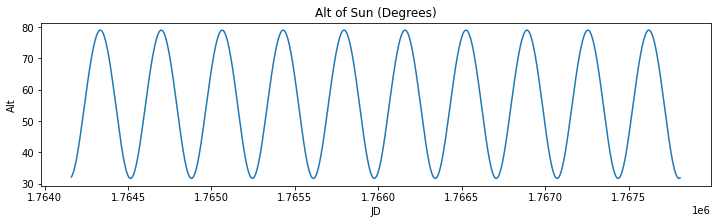

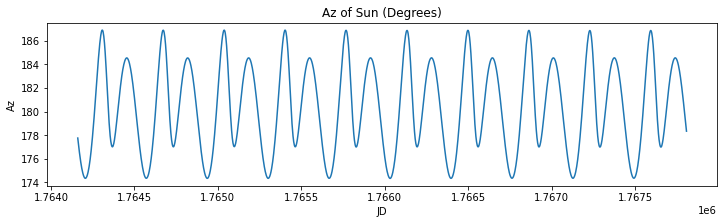

In [8]:

plt.figure(figsize=(12,3))
chart = sns.lineplot(
    data=df, 
    x="JD",
    y="Alt")
chart.set_title("Alt of Sun (Degrees)")

plt.figure(figsize=(12,3))
chart = sns.lineplot(
    data=df, 
    x="JD",
    y="Az")
chart.set_title("Az of Sun (Degrees)")

As expected from the geocentric model theory, since the sun is orbiting the earth, Alt and Az of the sun are triangle functions of time

In [9]:
def featurize(X,T):
    t = np.array(X['JD'])
    X['sin'] = np.array(np.sin(2*np.pi/T*t))
    X['cos'] = np.array(np.cos(2*np.pi/T*t))
    X = X.drop(['JD'], axis=1)
    X['1'] = np.ones(X.shape[0])
    return X

count = df.shape[0]

# split the date into training and testing set
train_count = int(0.6*count)
test_count = count - train_count
y_train = df['Alt'].head(train_count)
mse = []

# have a guess about T, the period of the function
for T in np.linspace(100, 400, num=3000):
    X_train = pd.DataFrame(df['JD']).head(train_count)
    X_train = featurize(X_train,T)
    reg = LinearRegression().fit(X_train, y_train)
    #reg = Lasso(alpha=0.1, tol=0.01, max_iter=100000).fit(X_train, y_train)
    y_pred = reg.predict(X_train)
    mse.append(sklearn.metrics.mean_squared_error(y_train,y_pred))


In [5]:
print(mse[np.argsort(mse)[0]])
T0 = np.linspace(100, 400, num=3000)[np.argsort(mse)[0]]
print(T0)

0.08461310338818387
365.2884294764922


In [6]:
y_train = df['Alt'].head(train_count)
T = np.linspace(100, 400, num=3000)[np.argsort(mse)[0]]
X_train = pd.DataFrame(df['JD']).head(train_count)
X_train = featurize(X_train,T)
reg = LinearRegression().fit(X_train, y_train)
#reg = Lasso(alpha=0.1, tol=0.01, max_iter=100000).fit(X_train, y_train)

X_test = pd.DataFrame(df['JD'])
X_test = featurize(X_test,T)
y_pred = reg.predict(X_test)

In [7]:
df_plot = pd.DataFrame(df['JD'].copy(),columns=['JD'])
df_plot['Alt'] = df['Alt']
df_plot['Alt_pred'] = y_pred
df_plot['Alt_err'] = df_plot['Alt_pred'] - df_plot['Alt']
df_plot

,JD,Alt,Alt_pred,Alt_err
1,1.764161e+06,32.164750,32.575447,0.410697
2,1.764163e+06,32.343833,32.732968,0.389134
3,1.764165e+06,32.552444,32.917691,0.365246
4,1.764167e+06,32.790194,33.129397,0.339203
5,1.764169e+06,33.056694,33.367837,0.311143
...,...,...,...,...
1821,1.767801e+06,31.731500,32.222350,0.490850
1822,1.767803e+06,31.721667,32.201578,0.479911
1823,1.767805e+06,31.742639,32.208636,0.465997
1824,1.767807e+06,31.794333,32.243518,0.449184


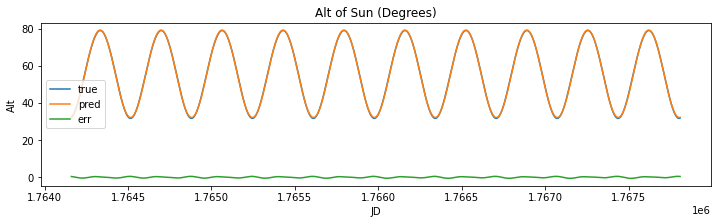

In [8]:
plt.figure(figsize=(12,3))

df_plot

chart = sns.lineplot(
    data=df_plot, 
    x='JD',
    y='Alt'
)

chart = sns.lineplot(
    data=df_plot, 
    x='JD',
    y='Alt_pred'
)

chart = sns.lineplot(
    data=df_plot, 
    x='JD',
    y='Alt_err'
)

chart.set_title("Alt of Sun (Degrees)")
plt.legend(labels=['true', 'pred','err'])

Now that Alt is a function of X,T where T is calculated as 365.2884294764922, take a guess that Az is a function with part of the function with the same T

In [9]:
def featurize_1(X,T):
    t = np.array(X['JD'])
    X['sin0'] = np.array(np.sin(2*np.pi/T0*t))
    X['cos0'] = np.array(np.cos(2*np.pi/T0*t))
    X['sin'] = np.array(np.sin(2*np.pi/T*t))
    X['cos'] = np.array(np.cos(2*np.pi/T*t))
    X = X.drop(['JD'], axis=1)
    X['1'] = np.ones(X.shape[0])
    return X

# split the date into training and testing set
train_count = int(0.6*count)
test_count = count - train_count
y_train = df['Az'].head(train_count)
mse = []

# have a guess about T, the period of the function
for T in np.linspace(100, 400, num=3000):
    X_train = pd.DataFrame(df['JD']).head(train_count)
    X_train = featurize_1(X_train,T)
    reg = LinearRegression().fit(X_train, y_train)
    #reg = Lasso(alpha=0.1, tol=0.01, max_iter=100000).fit(X_train, y_train)
    y_pred = reg.predict(X_train)
    mse.append(sklearn.metrics.mean_squared_error(y_train,y_pred))

In [10]:
print(mse[np.argsort(mse)[0]])
print(np.linspace(100, 400, num=3000)[np.argsort(mse)[0]])

1.2282135796390798
182.32744248082696


In [11]:
y_train = df['Az'].head(train_count)
T = np.linspace(100, 400, num=3000)[np.argsort(mse)[0]]
X_train = pd.DataFrame(df['JD']).head(train_count)
X_train = featurize_1(X_train,T)
reg = LinearRegression().fit(X_train, y_train)
#reg = Lasso(alpha=0.1, tol=0.01, max_iter=100000).fit(X_train, y_train)

X_test = pd.DataFrame(df['JD'])
X_test = featurize_1(X_test,T)
y_pred = reg.predict(X_test)

In [12]:
y_train = df['Az'].head(train_count)
T = np.linspace(100, 400, num=3000)[np.argsort(mse)[0]]
X_train = pd.DataFrame(df['JD']).head(train_count)
X_train = featurize(X_train,T)
reg = LinearRegression().fit(X_train, y_train)
#reg = Lasso(alpha=0.1, tol=0.01, max_iter=100000).fit(X_train, y_train)

X_test = pd.DataFrame(df['JD'])
X_test = featurize(X_test,T)
y_pred = reg.predict(X_test)

In [13]:
df_plot = pd.DataFrame(df['JD'].copy(),columns=['JD'])
df_plot['Az'] = df['Az']
df_plot['Az_pred'] = y_pred
df_plot['Az_err'] = df_plot['Az_pred'] - df_plot['Az']
df_plot

,JD,Az,Az_pred,Az_err
1,1.764161e+06,177.755250,179.656936,1.901686
2,1.764163e+06,177.499361,179.359237,1.859876
3,1.764165e+06,177.248611,179.066369,1.817758
4,1.764167e+06,177.003833,178.779721,1.775888
5,1.764169e+06,176.765861,178.500655,1.734794
...,...,...,...,...
1821,1.767801e+06,179.425611,180.648033,1.222422
1822,1.767803e+06,179.151361,180.344487,1.193126
1823,1.767805e+06,178.878083,180.041092,1.163009
1824,1.767807e+06,178.606667,179.739289,1.132623


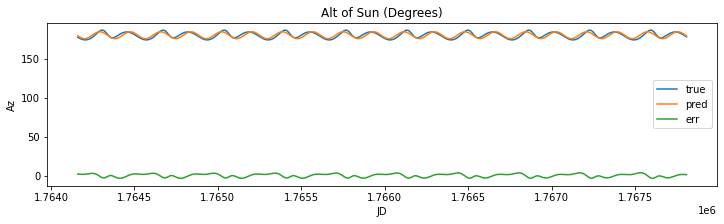

In [14]:
plt.figure(figsize=(12,3))

df_plot

chart = sns.lineplot(
    data=df_plot, 
    x='JD',
    y='Az'
)

chart = sns.lineplot(
    data=df_plot, 
    x='JD',
    y='Az_pred'
)

chart = sns.lineplot(
    data=df_plot, 
    x='JD',
    y='Az_err'
)

chart.set_title("Alt of Sun (Degrees)")
plt.legend(labels=['true', 'pred','err'])

At this point the error is low but it's still visable and some pattern can be recognized. A Fourier fitting algorithm based on linear regression is proposed as following

### Tuned Fourier fitting algorithm based on linear regression

In [25]:
from tqdm import tqdm

def split_by_fractions(df:pd.DataFrame, fracs:list): #, random_state:int=42):
    assert sum(fracs)==1.0, 'fractions sum is not 1.0 (fractions_sum={})'.format(sum(fracs))
    remain = df.index.copy().to_frame()
    res = []
    for i in range(len(fracs)):
        fractions_sum=sum(fracs[i:])
        frac = fracs[i]/fractions_sum
        idxs = remain.sample(frac=frac).index
        remain=remain.drop(idxs)
        res.append(idxs)
    return [df.loc[idxs] for idxs in res]

def featurize_with_T(X,T):
    X_featurized = X.copy()
    t = np.array(X['JD'])
    X_featurized['sin' + str(T)] = np.array(np.sin(2*np.pi/T*t))
    X_featurized['cos' + str(T)] = np.array(np.cos(2*np.pi/T*t))
    return X_featurized

def featurize_with_Ts(X,Ts):
    X_featurized = X.copy()
    t = np.array(X['JD'])
    for T in Ts:
        X_featurized = featurize_with_T(X_featurized,T)
    X_featurized['1'] = np.ones(X_featurized.shape[0])
    return X_featurized

def featurize_with_1(X):
    X_featurized = X.copy()
    X_featurized = X_featurized.drop(['JD'], axis=1)
    X_featurized['1'] = np.ones(X_featurized.shape[0])
    return X_featurized

def featurize(X,Ts):
    return featurize_with_1(featurize_with_Ts(X,Ts))

def train(X, y, method):
    reg = None
    if method == 'lr':
        reg = LinearRegression().fit(X, y)
    if method == 'lasso':
        reg = Lasso(alpha=0.1, tol=0.01, max_iter=100000).fit(X, y)
    return reg
    
def train_with_range(train_range, 
                     Ts, 
                     X_train, 
                     X_val, 
                     y_train, 
                     y_val, 
                     method = 'lr'):
    val_mses = []
    ws = []
    for T in train_range:
        Ts_new = Ts.copy()
        Ts_new.append(T)
        X_train_featurized = featurize(X_train,Ts_new)
        X_val_featurized = featurize(X_val,Ts_new)
        reg = train(X_train_featurized, y_train, method)
        y_val_pred = reg.predict(X_val_featurized)
        val_mses.append(sklearn.metrics.mean_squared_error(y_val_pred,y_val))
        ws.append(reg.coef_)
    return val_mses, ws

def cal_new_range(former_range, mses, new_range_num):
    new_range_center_point_index = np.argsort(mses)[0]
    new_range_point_start = former_range[new_range_center_point_index-1]
    new_range_point_end   = former_range[new_range_center_point_index+1]
    new_range = np.linspace(new_range_point_start, new_range_point_end, num=new_range_num)
    return(new_range)

def remove_known_features(X,y,Ts,method):
    # remove known features
    Ts = Ts.copy()
    X_featurized = featurize(X,Ts)
    reg = train(X_featurized, y, method)
            
    y_pred = reg.predict(X_featurized)
    y_err = y_pred - y
    y = y_err
    
    # Split into train and val
    training_count = 0.8*X.shape[0]
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    return X_train, X_val, y_train, y_val

def tuned_fourier(X,
                  y,
                  Ts = [],
                  best_val_mses = [],
                  order_limit = 5,
                  initial_range=np.logspace(-3, 5, num=1000),
                  new_range_iter_num = 3,
                  new_range_num = 10,
                  method = 'lr'):
    
    Ts = Ts.copy()
    previous_best_val_mse = np.inf
    best_val_mse = 0
    
    for cur_order in tqdm(np.arange(order_limit)):
        X_train, X_val, y_train, y_val = remove_known_features(X,y,Ts,method)
        if len(Ts) > 0:
            previous_best_val_mse = best_val_mses[-1]

        val_mses, ws = train_with_range(initial_range, 
                                        Ts, 
                                        X_train, 
                                        X_val, 
                                        y_train, 
                                        y_val, 
                                        method = method)

        former_range = initial_range

        # do it again in new range
        for iter in np.arange(new_range_iter_num-1):
            new_range = cal_new_range(former_range, val_mses, new_range_num)
            val_mses, ws = train_with_range(new_range, 
                                            Ts, 
                                            X_train, 
                                            X_val, 
                                            y_train, 
                                            y_val, 
                                            method = method)
            former_range = new_range

        best_index = np.argsort(val_mses)[0]
        best_val_mse = val_mses[best_index]
        new_best_T = former_range[best_index]
        best_w = ws[best_index]
            
        if best_val_mse < previous_best_val_mse:
            # record parameter
            Ts.append(new_best_T)
            best_val_mses.append(best_val_mse)
            previous_best_val_mse = best_val_mse
            previous_best_w = best_w
        else:
            break
    return Ts, previous_best_val_mse
    

def forier_predict(X_test, X_train, y_train, Ts):
    Ts = Ts.copy()
    w=[]
    X_train_featurized = featurize(X_train,Ts)
    reg = LinearRegression().fit(X_train_featurized, y_train)
    X_test_featurized = featurize(X_test,Ts)
    y_pred = reg.predict(X_test_featurized)
    w=reg.coef_
    return(y_pred,w)
    
def process(df,
            body,
            term,
            order_limit = 5,
            Ts = [],
            initial_range=np.logspace(-3, 5, num=1000),
            new_range_iter_num = 3,
            new_range_num = 10
            ):
    count = df.shape[0]
    train_count = int(0.6*count)
    test_count = count - train_count

    y_train = df[term].head(train_count)
    X_train = pd.DataFrame(df['JD']).head(train_count)
    Ts, best_val_mse = tuned_fourier(X_train,
                                     y_train,
                                     Ts = [],
                                     best_val_mses = [],
                                     order_limit = order_limit,
                                     initial_range = initial_range,
                                     new_range_iter_num = new_range_iter_num,
                                     new_range_num = new_range_num,
                                     method = 'lr')
    print('Ts:')
    print(Ts)
    print('best_val_mse:')
    print(best_val_mse)
    X_pred = pd.DataFrame(df['JD'])
    y_pred, w = forier_predict(X_pred, X_train, y_train, Ts)
    print('w:')
    print(w)
    
    JD_train = pd.DataFrame(df['JD']).head(train_count)
    JD_test = pd.DataFrame(df['JD']).tail(test_count)
    y_train_pred = pd.DataFrame(y_pred).head(train_count)
    y_test_pred = pd.DataFrame(y_pred).tail(test_count)
    
    # plot prediction
    plt.figure(figsize=(12, 3))
    plt.plot(df['JD'].values, df[term].values, 'k--', label='true')
    
    plt.scatter(JD_train, y_train_pred, c='b', label='train', s=0.4)
    plt.scatter(JD_test, y_test_pred, c='r', label='test', s=0.4)
    

    #plt.scatter(JD_train, y_train_pred[0].values-df[term].head(train_count).values, c='g', label='train_error')
    #plt.scatter(JD_test, y_test_pred[0].values-df[term].tail(test_count).values, c='y', label='test_error')
    
    # test mse
    print('Test MSE:')
    print(sklearn.metrics.mean_squared_error(df[term].tail(test_count).values,y_test_pred[0].values))
    
    plt.xlabel('JD')
    plt.ylabel(term)
    plt.title(body + ' ' + term)
    plt.legend(loc='upper left')
    plt.show()
    
    plt.figure(figsize=(12, 3))
    plt.bar(Ts,np.abs(w[::2][:-1]))
    plt.bar(Ts,np.abs(w[1:][::2]))

#### Sun daily

100%|██████████| 5/5 [01:04<00:00, 12.94s/it]


Ts:
[365.3954613530954, 183.1535573154589, 121.58003123774948, 368.07460082125647, 91.57234286262894]
best_val_mse:
0.000364657326805033
w:
[-8.65657098e+00 -2.33125501e+01 -2.77375379e-02 -3.87334898e-01
 -1.28950657e-01 -1.30856553e-02 -8.48998562e-01  1.05084066e+00
  1.76730052e-02  1.72811027e-02  0.00000000e+00]
Test MSE:
0.003389098069012159


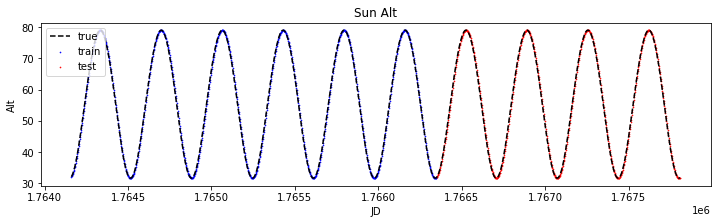

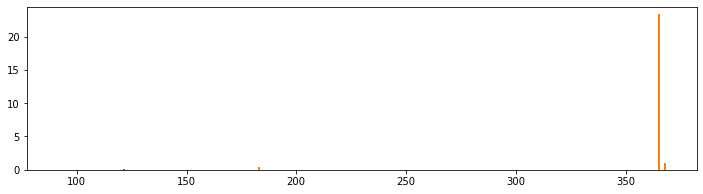

In [26]:
# import daily noon sun position of every 2 days, 118.1.1 to 128.1.1
process(df = pd.read_pickle("sun_48h_noon.df").drop(0),
        body = 'Sun',
        term = 'Alt',
       )

 40%|████      | 4/10 [01:04<01:36, 16.15s/it]


Ts:
[182.48880321894742, 365.7303537866156, 121.58003123774948, 91.30129392710086]
best_val_mse:
0.039983698161569485
w:
[-1.47025587  4.14690189  2.47411392 -0.29697935  0.08753745 -1.42558716
  0.26607455  0.52299644  0.        ]
Test MSE:
0.07447978252704456


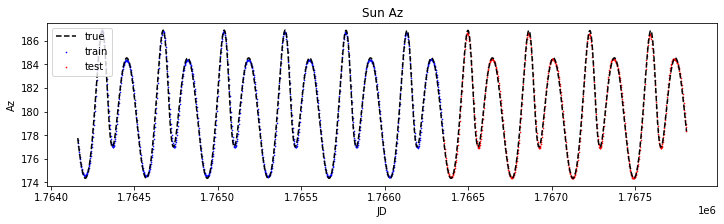

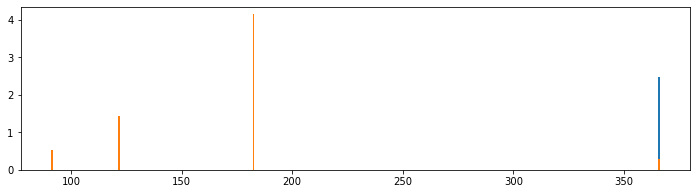

In [27]:
process(df = pd.read_pickle("sun_48h_noon.df").drop(0),
        body = 'Sun',
        term = 'Az',
        order_limit = 10,
       )

#### Sun hourly

 10%|█         | 4/40 [29:03<4:21:35, 435.98s/it]


Ts:
[0.33302240994686616, 0.33332097000515143, 0.3333873166847704, 0.3332546233255325]
best_val_mse:
307.17220533770876
w:
[ 0.13362476  0.57744363 -1.05230987 -1.71984078 -0.44178464  0.03124462
  0.2743004  -0.16371867  0.        ]
Test MSE:
319.58211371461704


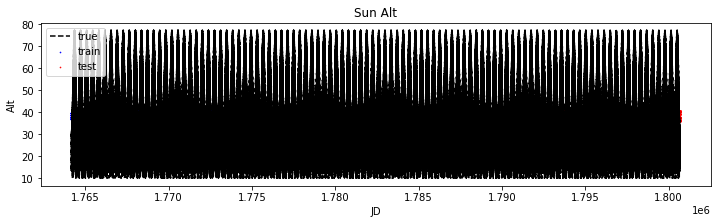

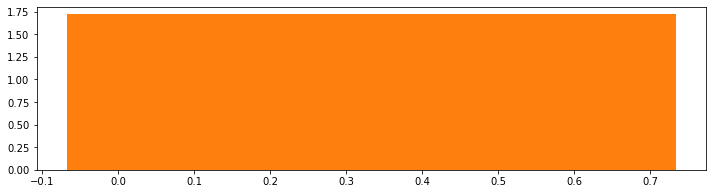

In [28]:
df = pd.read_pickle("sun_1h_100year.df")
df = df.loc[df['Alt']>10]
process(df,
        body = 'Sun',
        term = 'Alt',
        order_limit = 40,
        initial_range=np.logspace(-2, 5, num=4000),
       )

Text(0.5, 1.0, 'Az of Sun (Degrees)')

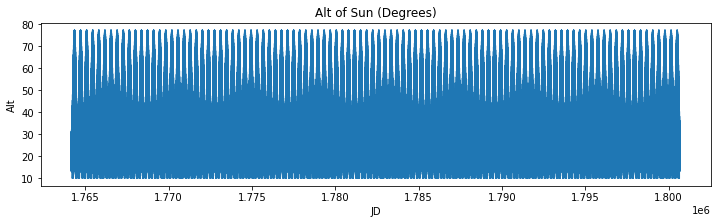

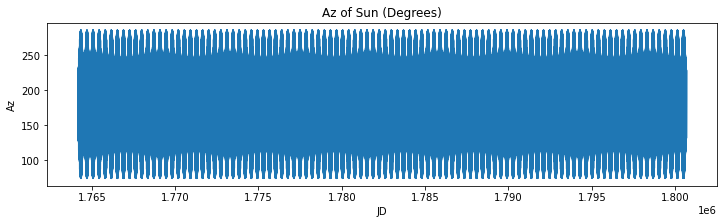

In [26]:



# import hourly sun position, 118.1.1 to 218.1.1
df = pd.read_pickle("sun_1h_100year.df")

# remove invisible
df=df.loc[df['Alt']>10]

plt.figure(figsize=(12,3))
chart = sns.lineplot(
    data=df, 
    x="JD",
    y="Alt")
chart.set_title("Alt of Sun (Degrees)")

plt.figure(figsize=(12,3))
chart = sns.lineplot(
    data=df, 
    x="JD",
    y="Az")
chart.set_title("Az of Sun (Degrees)")

In [27]:
# Ts_sun_hourly_alt_initial = Ts_sun_daily_alt
# Calculated with np.logspace(-1, 5, num=5000)
Ts_sun_hourly_alt_initial = [365.27881416770305, 182.84051728496172, 121.69239947017725, 91.24912791579457, 414.0323151434263, 334.0709396264952, 73.03950415061526, 173.00128411239524, 470.8946320057431, 192.5187814076703, 60.8460986238764, 125.67638345416123, 164.12786523897634, 52.13364880031547, 621.7226317226317, 283.68762702096035, 89.45834723612501, 45.67476567476567, 1060.2425657981212, 133.76507820952267, 0.9999995639498521, 361.2995666087627, 368.8885389688343, 181.79855801102798, 0.1665906467223982, 0.1667428686494918, 1.0000272154582346, 0.5006854364282269, 0.49931744342758855, 357.71820055791596, 183.68101975930455, 0.999977442743146, 0.1668950905765854, 0.1667419460923579, 374.75122133662563]

100%|██████████| 15/15 [49:51<00:00, 199.43s/it]


[365.27881416770305, 182.84051728496172, 121.69239947017725, 91.24912791579457, 414.0323151434263, 334.0709396264952, 73.03950415061526, 173.00128411239524, 470.8946320057431, 192.5187814076703, 60.8460986238764, 125.67638345416123, 164.12786523897634, 52.13364880031547, 621.7226317226317, 283.68762702096035, 89.45834723612501, 45.67476567476567, 1060.2425657981212, 133.76507820952267, 0.9999995639498521, 361.2995666087627, 368.8885389688343, 181.79855801102798, 0.1665906467223982, 0.1667428686494918, 1.0000272154582346, 0.5006854364282269, 0.49931744342758855, 357.71820055791596, 183.68101975930455, 0.999977442743146, 0.1668950905765854, 0.1667419460923579, 374.75122133662563, 0.4993243107458696, 0.49999541102613515, 0.5000200385593558, 0.4993089185376066, 0.5013745528864973, 0.5006880603979689, 0.01960888432358835, 0.019601530299472772, 0.01960683484145778, 0.01960779930363687, 0.019617323367655405, 0.01960996934353983, 0.019607919861409258, 0.0196057498215063, 0.019613103845621878]


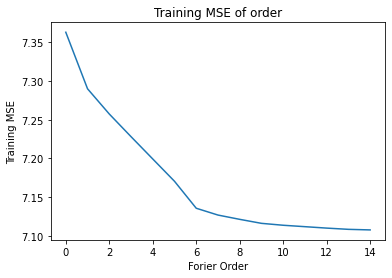

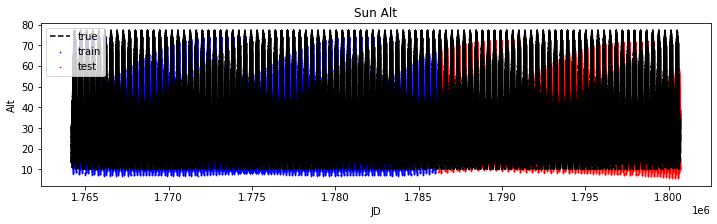

In [28]:
count = df.shape[0]
train_count = int(0.6*count)
test_count = count - train_count

y_train = df['Alt'].head(train_count)
X_train = pd.DataFrame(df['JD']).head(train_count)
Ts_sun_hourly_alt = forier_fit(X_train, y_train, 15, initial_range=np.logspace(-3, 1, num=3000), new_range_num = 1000 ,Ts = Ts_sun_hourly_alt_initial)
print(Ts_sun_hourly_alt)
X_pred = pd.DataFrame(df['JD'])
y_pred = forier_predict(X_pred, X_train, y_train,Ts_sun_hourly_alt)
plot_by_body(df, 'Sun', 'Alt', y_pred)

In [29]:
# Ts_sun_hourly_alt_initial = Ts_sun_daily_az
# Calculated with np.logspace(-1, 5, num=5000)
Ts_sun_hourly_az_initial = [182.13627769183324, 364.6349379682713, 121.61191494524827, 91.24912791579457, 172.5183769628214, 72.9590196256863, 191.65357276468387, 163.32301998968666, 60.88634088634089, 125.67638345416123, 408.70021536688205, 52.13364880031547, 89.2571359238026, 329.92598659265326, 45.67476567476567, 116.32005743116854, 152.558214780437, 210.64792064792064, 74.52846786180119, 477.112061556506, 27827.90019973484, 0.10027674772570727, 10510.600247660128, 7007.100257355982, 600.7002750855754, 2102.2002709302033, 2302.4002703761507, 200.30027619366592, 2002.1002712072222, 2602.700269545079, 2903.0002687140077, 1801.9002717612748, 3303.4002676059026, 800.9002745315229, 2102.2002709302033]

100%|██████████| 15/15 [33:40<00:00, 134.68s/it]

[182.13627769183324, 364.6349379682713, 121.61191494524827, 91.24912791579457, 172.5183769628214, 72.9590196256863, 191.65357276468387, 163.32301998968666, 60.88634088634089, 125.67638345416123, 408.70021536688205, 52.13364880031547, 89.2571359238026, 329.92598659265326, 45.67476567476567, 116.32005743116854, 152.558214780437, 210.64792064792064, 74.52846786180119, 477.112061556506, 27827.90019973484, 0.10027674772570727, 10510.600247660128, 7007.100257355982, 600.7002750855754, 2102.2002709302033, 2302.4002703761507, 200.30027619366592, 2002.1002712072222, 2602.700269545079, 2903.0002687140077, 1801.9002717612748, 3303.4002676059026, 800.9002745315229, 2102.2002709302033, 0.49999848946778774, 0.4993181538625644, 0.5006880603979689, 1.0019036688651557, 0.9918946629350831, 8.698829229090624, 0.7817055384035676, 1.4422999297883283, 0.711642496893063, 9.129216484083724, 1.3822458942078963, 2.132921338963306, 0.9818856570050105, 1.0119126747952265, 5.796217509369705]


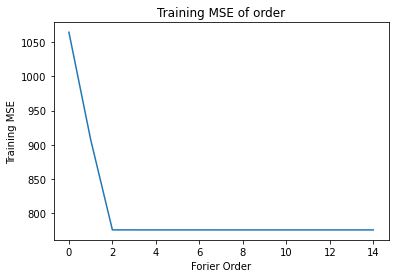

In [30]:
count = df.shape[0]
train_count = int(0.6*count)
test_count = count - train_count

y_train = df['Az'].head(train_count)
X_train = pd.DataFrame(df['JD']).head(train_count)

Ts_sun_hourly_az = forier_fit(X_train, y_train, 15, initial_range=np.logspace(-3, 1, num=3000), new_range_num = 1000, Ts = Ts_sun_hourly_az_initial)

print(Ts_sun_hourly_az)


Test MSE:
1907.424276267445


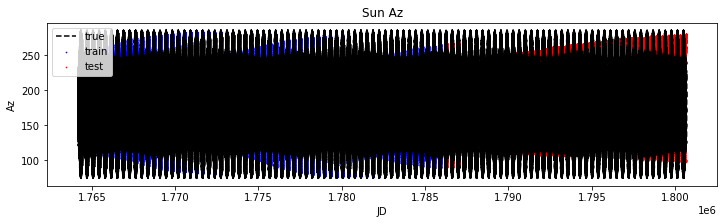

In [31]:
X_pred = pd.DataFrame(df['JD'])
y_pred = forier_predict(X_pred, X_train, y_train, Ts_sun_hourly_az)
plot_by_body(df, 'Sun', 'Az', y_pred)

### Moon Hourly Prediction

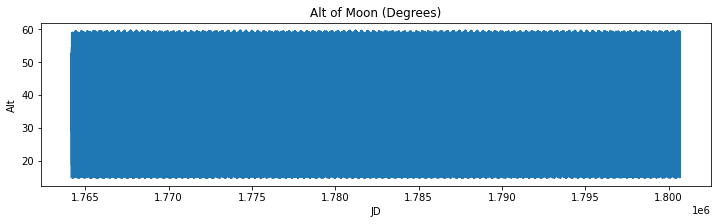

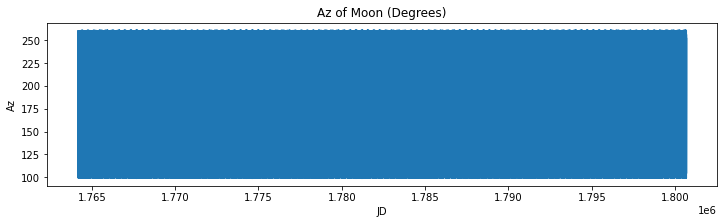

In [32]:
# import hourly moon position, 118.1.1 to 218.1.1
df = pd.read_pickle("moon_1h_100year.df")
df = df.drop(0)

# remove invisible
df=df.loc[df['Alt']>10]

plt.figure(figsize=(12,3))
chart = sns.lineplot(
    data=df, 
    x="JD",
    y="Alt")
chart.set_title("Alt of Moon (Degrees)")

plt.figure(figsize=(12,3))
chart = sns.lineplot(
    data=df, 
    x="JD",
    y="Az")
chart.set_title("Az of Moon (Degrees)")

count = df.shape[0]
train_count = int(0.6*count)
test_count = count - train_count

In [33]:
Ts_moon_hourly_alt_initial = [1]

100%|██████████| 15/15 [34:27<00:00, 137.85s/it]


[1, 27.2122567646957, 2020.2030036170763, 4040.4050035425025, 3030.3040035797894, 6060.607003467929, 5050.506003505216, 100000.0, 17171.718003057744, 9090.910003356053, 2020.2030036170763, 3030.3040035797894, 100000.0, 7070.708003430642, 4040.4050035425025, 9090.910003356053]
Test MSE:
37.92167962180372


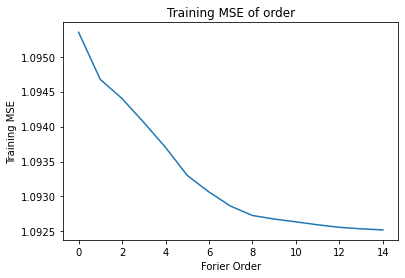

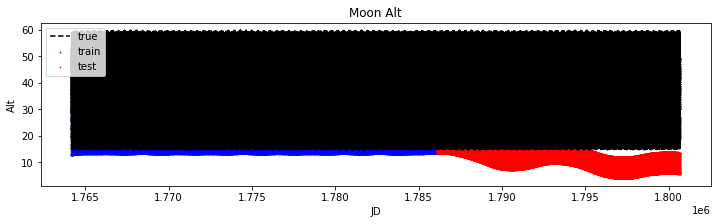

In [34]:
y_train = df['Alt'].head(train_count)
X_train = pd.DataFrame(df['JD']).head(train_count)
Ts_moon_hourly_alt = forier_fit(X_train, y_train, 15, initial_range=np.logspace(-3, 5, num=5000),Ts = Ts_moon_hourly_alt_initial)
print(Ts_moon_hourly_alt)

X_pred = pd.DataFrame(df['JD'])
y_pred = forier_predict(X_pred, X_train, y_train, Ts_moon_hourly_alt)
plot_by_body(df, 'Moon', 'Alt', y_pred)

In [35]:
Ts_moon_hourly_az_initial = [1]

100%|██████████| 9/9 [20:31<00:00, 136.88s/it]


[1, 100000.0, 17171.718003057744, 10101.011003318767, 7070.708003430642, 100000.0, 6060.607003467929, 5050.506003505216, 1010.1020036543778, 3030.3040035797894]
Test MSE:
12.262188953804115


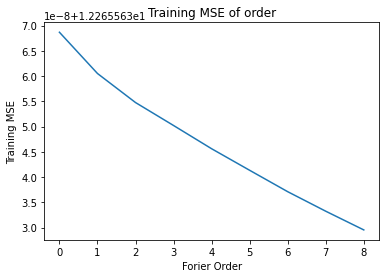

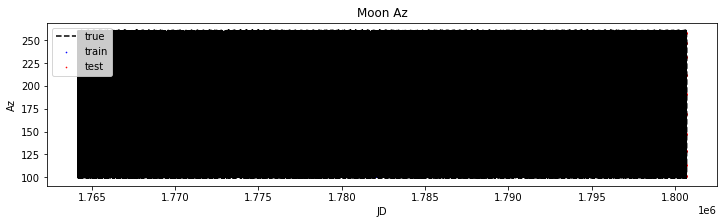

In [36]:
y_train = df['Az'].head(train_count)
X_train = pd.DataFrame(df['JD']).head(train_count)
Ts_moon_hourly_az = forier_fit(X_train, y_train, 9, initial_range=np.logspace(-3, 5, num=5000),Ts=Ts_moon_hourly_az_initial)
print(Ts_moon_hourly_az)

X_pred = pd.DataFrame(df['JD'])
y_pred = forier_predict(X_pred, X_train, y_train, Ts_moon_hourly_az)
plot_by_body(df, 'Moon', 'Az', y_pred)

### Planet Daily Prediction Example: Mars

Text(0.5, 1.0, 'Az of Mars (Degrees)')

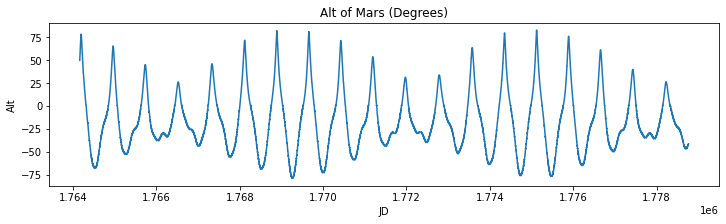

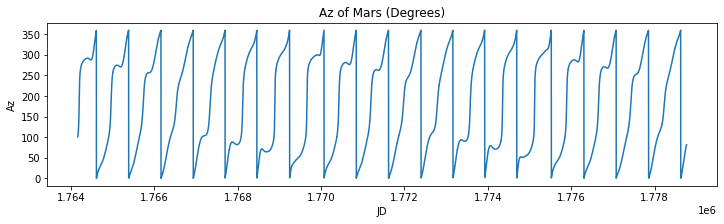

In [37]:
# import mars daily position, 118.1.1 to 
df = pd.read_pickle("mars_48h_midnight.df")
df = df.drop(0)

# remove invisible
# df=df.loc[df['Alt']>10]

plt.figure(figsize=(12,3))
chart = sns.lineplot(
    data=df, 
    x="JD",
    y="Alt")
chart.set_title("Alt of Mars (Degrees)")

plt.figure(figsize=(12,3))
chart = sns.lineplot(
    data=df, 
    x="JD",
    y="Az")
chart.set_title("Az of Mars (Degrees)")


100%|██████████| 15/15 [03:11<00:00, 12.76s/it]

[780.8786564544849, 686.4966612989944, 389.8375433607285, 260.2075046480608, 195.10937482267926, 774.1849051797006, 364.9536039682675, 248.93616498095673, 343.5845989017219, 156.1148947886851, 188.98096903746602, 151.96376783880294, 915.4040921295367, 130.06459131921073, 237.69169232503648]


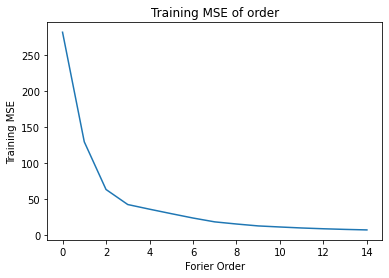

In [38]:
count = df.shape[0]
# split the date into training and testing set
train_count = int(0.6*count)
test_count = count - train_count

y_train = df['Alt'].head(train_count)
X_train = pd.DataFrame(df['JD']).head(train_count)
Ts_mars_daily_alt = forier_fit(X_train, y_train, 15, initial_range=np.logspace(0, 5, num=3000))
print(Ts_mars_daily_alt)


Test MSE:
8.780183623399513


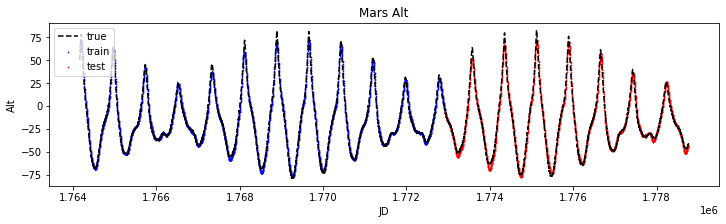

In [39]:
X_pred = pd.DataFrame(df['JD'])
y_pred = forier_predict(X_pred, X_train, y_train, Ts_mars_daily_alt)
plot_by_body(df, 'Mars', 'Alt', y_pred)

Text(0.5, 1.0, 'Az of Mars (Degrees)')

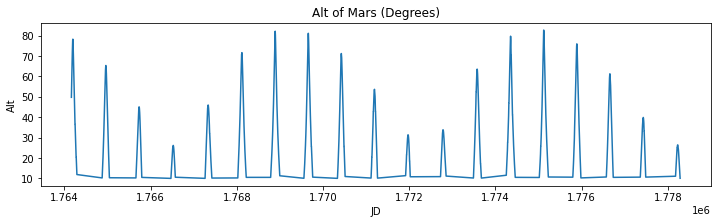

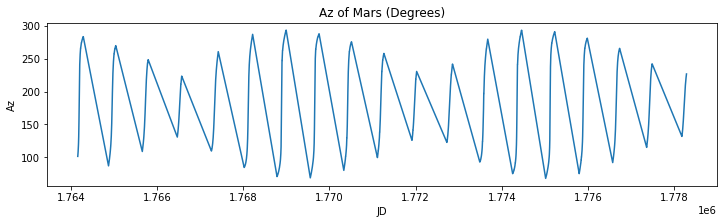

In [52]:
# import mars daily position, 118.1.1 to 
df = pd.read_pickle("mars_48h_midnight.df")
df = df.drop(0)

# remove invisible
df=df.loc[df['Alt']>10]

plt.figure(figsize=(12,3))
chart = sns.lineplot(
    data=df, 
    x="JD",
    y="Alt")
chart.set_title("Alt of Mars (Degrees)")

plt.figure(figsize=(12,3))
chart = sns.lineplot(
    data=df, 
    x="JD",
    y="Az")
chart.set_title("Az of Mars (Degrees)")

100%|██████████| 15/15 [02:59<00:00, 11.95s/it]

[195.24571102497416, 365.1518588889758, 127.16211159020764, 419.43234153788535, 258.5982384973387, 160.57869371145333, 611.817305771719, 86.6100266867255, 75.98851258501396, 59.3755647409628, 87.89571157471968, 901.7340525471963, 155.2336890344405, 187.02728547688366, 147.47070508839897]
Test MSE:
12.837541330396984


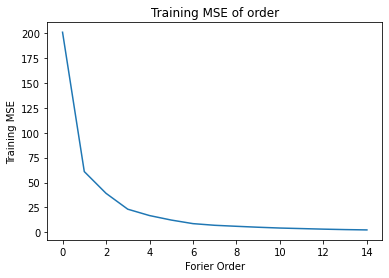

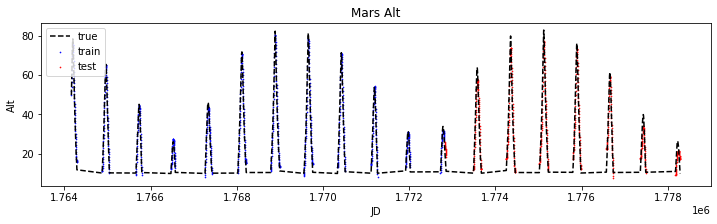

In [41]:
count = df.shape[0]
# split the date into training and testing set
train_count = int(0.6*count)
test_count = count - train_count

y_train = df['Alt'].head(train_count)
X_train = pd.DataFrame(df['JD']).head(train_count)
Ts_mars_daily_alt = forier_fit(X_train, y_train, 15, initial_range=np.logspace(0, 5, num=3000))
print(Ts_mars_daily_alt)

X_pred = pd.DataFrame(df['JD'])
y_pred = forier_predict(X_pred, X_train, y_train, Ts_mars_daily_alt)
plot_by_body(df, 'Mars', 'Alt', y_pred)

100%|██████████| 15/15 [02:00<00:00,  8.03s/it]

[182.13627769183324, 364.6349379682713, 121.61191494524827, 91.24912791579457, 172.5183769628214, 72.9590196256863, 191.65357276468387, 163.32301998968666, 60.88634088634089, 125.67638345416123, 408.70021536688205, 52.13364880031547, 89.2571359238026, 329.92598659265326, 45.67476567476567, 116.32005743116854, 152.558214780437, 210.64792064792064, 74.52846786180119, 477.112061556506, 27827.90019973484, 0.10027674772570727, 10510.600247660128, 7007.100257355982, 600.7002750855754, 2102.2002709302033, 2302.4002703761507, 200.30027619366592, 2002.1002712072222, 2602.700269545079, 2903.0002687140077, 1801.9002717612748, 3303.4002676059026, 800.9002745315229, 2102.2002709302033, 0.49999848946778774, 0.4993181538625644, 0.5006880603979689, 1.0019036688651557, 0.9918946629350831, 8.698829229090624, 0.7817055384035676, 1.4422999297883283, 0.711642496893063, 9.129216484083724, 1.3822458942078963, 2.132921338963306, 0.9818856570050105, 1.0119126747952265, 5.796217509369705]


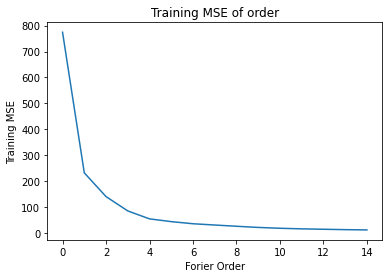

In [53]:
count = df.shape[0]
train_count = int(0.6*count)
test_count = count - train_count

y_train = df['Az'].head(train_count)
X_train = pd.DataFrame(df['JD']).head(train_count)

Ts_mars_daily_az = forier_fit(X_train, y_train, 15, initial_range=np.logspace(-1, 5, num=1000), new_range_num = 1000)

print(Ts_sun_hourly_az)

X_pred = pd.DataFrame(df['JD'])
y_pred = forier_predict(X_pred, X_train, y_train, Ts_mars_daily_az)

Test MSE:
30.814544431229972


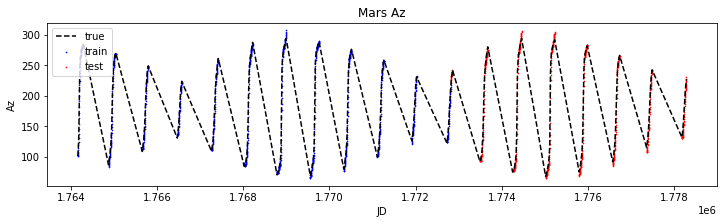

In [54]:
plot_by_body(df, 'Mars', 'Az', y_pred)

### Planet Daily Prediction Examle: Mercury
Mercury is an interesting example cause it's almost always at the same side of the sun. To make things simple we have ignored the invisible restriction here.

Text(0.5, 1.0, 'Az of Mercury (Degrees)')

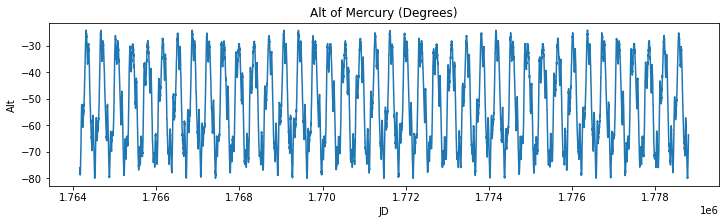

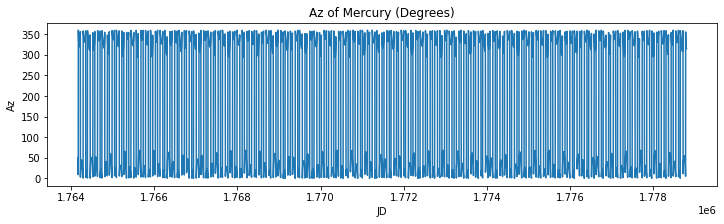

In [43]:
# import mercury daily position, 118.1.1 to 
df = pd.read_pickle("mercury_48h_midnight.df")
df = df.drop(0)

# remove invisible
# df=df.loc[df['Alt']>10]

plt.figure(figsize=(12,3))
chart = sns.lineplot(
    data=df, 
    x="JD",
    y="Alt")
chart.set_title("Alt of Mercury (Degrees)")

plt.figure(figsize=(12,3))
chart = sns.lineplot(
    data=df, 
    x="JD",
    y="Az")
chart.set_title("Az of Mercury (Degrees)")


In [44]:
count = df.shape[0]
train_count = int(0.6*count)
test_count = count - train_count

100%|██████████| 15/15 [11:13<00:00, 44.93s/it]


[365.20850315203535, 87.97069738821264, 169.7605302842831, 57.93582544985589, 182.633813933721, 68.85549082382835, 38.62292284112941, 115.86181557970534, 34.9296208065281, 317.3413942785361, 43.20140361695455, 43.983995130505456, 28.971565680479866, 26.838749619179488, 70.87098699503083]
Test MSE:
0.6427315531093256


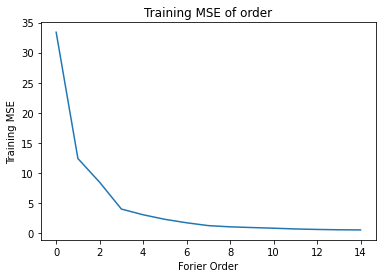

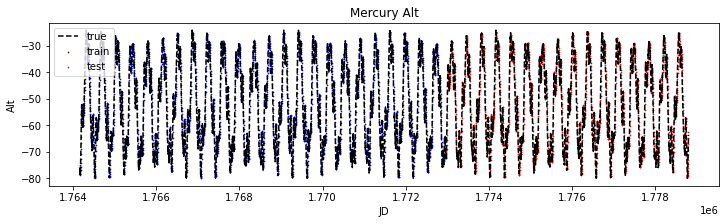

In [46]:
y_train = df['Alt'].head(train_count)
X_train = pd.DataFrame(df['JD']).head(train_count)
Ts_mercury_daily_alt = forier_fit(X_train, y_train, 15, initial_range=np.logspace(0, 5, num=3000))
print(Ts_mercury_daily_alt)

X_pred = pd.DataFrame(df['JD'])
y_pred = forier_predict(X_pred, X_train, y_train, Ts_mercury_daily_alt)
plot_by_body(df, 'Mercury', 'Alt', y_pred)

100%|██████████| 15/15 [02:07<00:00,  8.47s/it]

[115.8784889491724, 0.6783793977161681, 0.6756788744874275, 0.6731802595374713, 0.6836542514994088, 365.0334154790196, 182.7493149594722, 316.99618265687917, 1.9215812021156005, 18.34242463882635, 1.9539255656807075, 1.9555861022030232, 23.176022750497214, 18.20395429028606, 169.8430664133105]


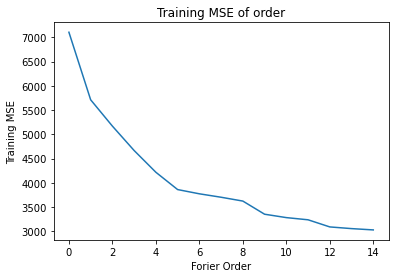

In [50]:
count = df.shape[0]
train_count = int(0.6*count)
test_count = count - train_count

y_train = df['Az'].head(train_count)
X_train = pd.DataFrame(df['JD']).head(train_count)

Ts_mercury_daily_az = forier_fit(X_train, y_train, 15, initial_range=np.logspace(-3, 5, num=1000), new_range_num = 1000)

print(Ts_mercury_daily_az)

X_pred = pd.DataFrame(df['JD'])
y_pred = forier_predict(X_pred, X_train, y_train, Ts_mercury_daily_az)

Test MSE:
3720.254846438651


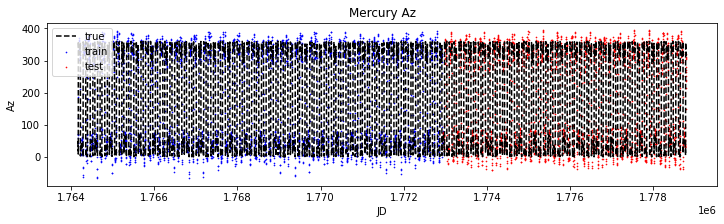

In [51]:
plot_by_body(df, 'Mercury', 'Az', y_pred)